In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import sklearn 
import tkinter as tk
from flask import Flask
from  dotenv import dotenv_values
import pyodbc

In [2]:
environment_variables = dotenv_values('.env')

In [3]:
server = environment_variables.get("dap-projects-database.database.windows.net")
database = environment_variables.get("dapDB")
username = environment_variables.get("LP1_learner")
password = environment_variables.get("Hyp0th3s!$T3$t!ng")

In [4]:
connection_string = f"DRIVER={{SQL Server}};SERVER={"dap-projects-database.database.windows.net"};DATABASE={"dapDB"};UID={"LP1_learner"};PWD={"Hyp0th3s!$T3$t!ng"};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [5]:
connection = pyodbc.connect(connection_string)

In [6]:
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data = pd.read_sql(query, connection)

C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\811209987.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


In [7]:
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [9]:
#Renaming the columns to have one title and not different titles meaning the same thing
data = {
    'Company_Brand': [0],
    'Sector': [3],
    'What_it_does': [4],
    'Stage': [8]
}
data = pd.read_sql(query, connection)

# Renaming multiple columns
data.rename(columns={
    'Company_Brand': 'Company_Name',
    'Sector': 'Industry',
    'What_it_does': 'About_Company',
    'Stage': 'Round/Series'
}, inplace=True)
data.head()


C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\1018150759.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [10]:
data["Amount"]

0         $1,200,000
1       $120,000,000
2        $30,000,000
3        $51,000,000
4         $2,000,000
            ...     
1204        $3000000
1205       $20000000
1206       $55000000
1207       $26000000
1208        $8000000
Name: Amount, Length: 1209, dtype: object

In [11]:
#Removing the dollar signs from the Amount$ column
data['Amount'] = data.Amount.str.replace('$', '')
data['Amount'] = data.Amount.str.replace(',', '')
data["Amount"]

0         1200000
1       120000000
2        30000000
3        51000000
4         2000000
          ...    
1204      3000000
1205     20000000
1206     55000000
1207     26000000
1208      8000000
Name: Amount, Length: 1209, dtype: object

In [12]:
# Assuming 'data' is your DataFrame
data = data.dropna(subset=['Founded', 'HeadQuarter', 'Investor', 'Amount', 'Round/Series'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Name   745 non-null    object 
 1   Founded        745 non-null    float64
 2   HeadQuarter    745 non-null    object 
 3   Industry       745 non-null    object 
 4   About_Company  745 non-null    object 
 5   Founders       741 non-null    object 
 6   Investor       745 non-null    object 
 7   Amount         745 non-null    object 
 8   Round/Series   745 non-null    object 
dtypes: float64(1), object(8)
memory usage: 58.2+ KB


In [13]:
data["Founded"]

0       2019.0
2       2012.0
3       2015.0
4       2021.0
7       2016.0
         ...  
1204    2019.0
1205    2015.0
1206    2019.0
1207    2015.0
1208    2019.0
Name: Founded, Length: 745, dtype: float64

In [14]:
# Writing our years in whole numbers
data['Founded'] = data['Founded'].astype(int)
data["Founded"]


0       2019
2       2012
3       2015
4       2021
7       2016
        ... 
1204    2019
1205    2015
1206    2019
1207    2015
1208    2019
Name: Founded, Length: 745, dtype: int64

In [15]:
data.head()

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
7,Qube Health,2016,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   745 non-null    object
 1   Founded        745 non-null    int64 
 2   HeadQuarter    745 non-null    object
 3   Industry       745 non-null    object
 4   About_Company  745 non-null    object
 5   Founders       741 non-null    object
 6   Investor       745 non-null    object
 7   Amount         745 non-null    object
 8   Round/Series   745 non-null    object
dtypes: int64(1), object(8)
memory usage: 58.2+ KB


In [17]:
#check for missing values still 
data.isna().any()

Company_Name     False
Founded          False
HeadQuarter      False
Industry         False
About_Company    False
Founders          True
Investor         False
Amount           False
Round/Series     False
dtype: bool

In [18]:
data.isna().sum()

Company_Name     0
Founded          0
HeadQuarter      0
Industry         0
About_Company    0
Founders         4
Investor         0
Amount           0
Round/Series     0
dtype: int64

In [19]:
#Check if the missing data is there by design or if it will impact analysis of the data as a whole  going forward
data_missing = data[data.isna().Founders]
data_missing

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
274,ByteLearn,2021,Noida,E-learning,AI powered teaching assistant for 100 Mn teach...,None,"Aditya Singhal, Nishant Sinha",9500000,Seed
558,The Sleep Company,2019,Mumbai,Consumer Goods,Patent Pending sleep technology developed by a...,None,Fireside Ventures,1000000,Pre-series A
1095,PredictiVu,2020,Gurugram,Management Consulting,PredictiVu's AI-enabled dashboard integrated w...,None,Kunal Sarkar,1500000,Pre-seed
1187,NeuroPixel.AI,2020,Bangalore,Deeptech,NeuroPixel.AI Labs is a deep tech start-up tha...,None,"Arvind Venugopal Nair, Amritendu Mukherjee",800000,Seed


In [20]:
data.columns

Index(['Company_Name', 'Founded', 'HeadQuarter', 'Industry', 'About_Company',
       'Founders', 'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [21]:
data.describe(include='object').columns

Index(['Company_Name', 'HeadQuarter', 'Industry', 'About_Company', 'Founders',
       'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [22]:
data.describe(include='number').columns

Index(['Founded'], dtype='object')

In [23]:
data.shape

(745, 9)

In [24]:
query = "SELECT * FROM dbo.LP1_startup_funding2020"

data2 = pd.read_sql(query, connection)

C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\553336433.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data2 = pd.read_sql(query, connection)


In [25]:
data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [27]:
#Renaming the columns to have one title and not different titles meaning the same thing
data2 = {
    'Company_Brand': [0],
    'Sector': [3],
    'What_it_does': [4],
    'Stage': [8]
}
data2 = pd.read_sql(query, connection)

# Renaming multiple columns
data2.rename(columns={
    'Company_Brand': 'Company_Name',
    'Sector': 'Industry',
    'What_it_does': 'About_Company',
    'Stage': 'Round/Series'
}, inplace=True)
data2 = data2.drop('column10', axis=1)
data2.head()


C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\3185913130.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data2 = pd.read_sql(query, connection)


,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


In [28]:
# Dropping the Null rows, Assuming 'data2' is your DataFrame
data2 = data2.dropna(subset=['Founded', 'HeadQuarter', 'Investor', 'Amount', 'Round/Series'])
data2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 1 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Name   353 non-null    object 
 1   Founded        353 non-null    float64
 2   HeadQuarter    353 non-null    object 
 3   Industry       349 non-null    object 
 4   About_Company  353 non-null    object 
 5   Founders       352 non-null    object 
 6   Investor       353 non-null    object 
 7   Amount         353 non-null    float64
 8   Round/Series   353 non-null    object 
dtypes: float64(2), object(7)
memory usage: 27.6+ KB


In [29]:
data2["Founded"]

1       2019.0
5       2019.0
6       2008.0
8       2015.0
9       2017.0
         ...  
1039    2014.0
1048    2016.0
1049    2017.0
1053    2015.0
1054    2017.0
Name: Founded, Length: 353, dtype: float64

In [30]:
# Writing our years in whole numbers
data2['Founded'] = data2['Founded'].astype(int)
data2["Founded"]

1       2019
5       2019
6       2008
8       2015
9       2017
        ... 
1039    2014
1048    2016
1049    2017
1053    2015
1054    2017
Name: Founded, Length: 353, dtype: int64

In [31]:
data2["Amount"]

1         100000.0
5         600000.0
6         600000.0
8       45000000.0
9        1000000.0
           ...    
1039     3400000.0
1048    14700000.0
1049     1000000.0
1053     8043000.0
1054     9000000.0
Name: Amount, Length: 353, dtype: float64

In [32]:
# Writing our Amount without the decimal point in whole numbers
data2['Amount'] = data2['Amount'].astype(int)
data2["Amount"]


1         100000
5         600000
6         600000
8       45000000
9        1000000
          ...   
1039     3400000
1048    14700000
1049     1000000
1053     8043000
1054     9000000
Name: Amount, Length: 353, dtype: int64

In [33]:
data2.head()

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000,Seed
6,MyClassboard,2008,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000,Pre-series A
8,Rupeek,2015,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000,Series C
9,Gig India,2017,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000,Pre-series A


In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 1 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   353 non-null    object
 1   Founded        353 non-null    int64 
 2   HeadQuarter    353 non-null    object
 3   Industry       349 non-null    object
 4   About_Company  353 non-null    object
 5   Founders       352 non-null    object
 6   Investor       353 non-null    object
 7   Amount         353 non-null    int64 
 8   Round/Series   353 non-null    object
dtypes: int64(2), object(7)
memory usage: 27.6+ KB


In [35]:
 #check for missing values still 
data2.isna().any()

Company_Name     False
Founded          False
HeadQuarter      False
Industry          True
About_Company    False
Founders          True
Investor         False
Amount           False
Round/Series     False
dtype: bool

In [36]:
#The data missing in the below columns is non-numerical so keeping it will not affect any further computation
data2.isna().sum()

Company_Name     0
Founded          0
HeadQuarter      0
Industry         4
About_Company    0
Founders         1
Investor         0
Amount           0
Round/Series     0
dtype: int64

In [37]:
data2.columns

Index(['Company_Name', 'Founded', 'HeadQuarter', 'Industry', 'About_Company',
       'Founders', 'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [38]:
data2.describe(include='object').columns

Index(['Company_Name', 'HeadQuarter', 'Industry', 'About_Company', 'Founders',
       'Investor', 'Round/Series'],
      dtype='object')

In [39]:
data2.describe(include='number').columns

Index(['Founded', 'Amount'], dtype='object')

In [40]:
data2.shape 

(353, 9)

In [41]:
import os
import pandas as pd
file_path = "C:\\Users\\MoseS\\Desktop\\LP 1 Project\\startup_funding2019.csv"
data3 = pd.read_csv(file_path)


In [42]:
data3.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [43]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [44]:
#Go to the csv file and convert the Rupee Values to its equal dollar value
#Renaming the columns to have one title and not different titles meaning the same thing
data3 = {
    'Company/Brand': [0],
    'Sector': [3],
    'What it does': [4],
    'Amount($)': [7],
    'Stage': [8]
}
data3 = pd.read_csv(file_path)

# Renaming multiple columns
data3.rename(columns={
    'Company/Brand': 'Company_Name',
    'Sector': 'Industry',
    'What it does': 'About_Company',
    'Amount($)': 'Amount',
    'Stage': 'Round/Series'
}, inplace=True)
data3.head()


,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [45]:
# Dropping rows with null values ,Assuming 'data' is your DataFrame
data3 = data3.dropna(subset=['Founded', 'HeadQuarter', 'Industry', 'Founders', 'Round/Series'])
data3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 86
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Name   23 non-null     object 
 1   Founded        23 non-null     float64
 2   HeadQuarter    23 non-null     object 
 3   Industry       23 non-null     object 
 4   About_Company  23 non-null     object 
 5   Founders       23 non-null     object 
 6   Investor       23 non-null     object 
 7   Amount         23 non-null     object 
 8   Round/Series   23 non-null     object 
dtypes: float64(1), object(8)
memory usage: 1.8+ KB


In [46]:
data3["Amount"]

1     $150,000,000
3      $30,000,000
7       $1,000,000
9     $275,000,000
12      $5,000,000
17     $15,000,000
19     Undisclosed
25      $1,500,000
26      $5,500,000
28     $12,000,000
35     $49,400,000
36     $32,000,000
38        $150,000
40      $2,000,000
50     $30,000,000
51      $4,000,000
53      $1,000,000
68     $25,000,000
72     $70,000,000
73     $60,000,000
75     Undisclosed
78      $2,100,000
86      $5,000,000
Name: Amount, dtype: object

In [47]:
#Removing the dollar signs from the Amount$ column
data3['Amount'] = data3.Amount.str.replace('$', '')
data3['Amount'] = data3.Amount.str.replace(',', '')
data3["Amount"]


1       150000000
3        30000000
7         1000000
9       275000000
12        5000000
17       15000000
19    Undisclosed
25        1500000
26        5500000
28       12000000
35       49400000
36       32000000
38         150000
40        2000000
50       30000000
51        4000000
53        1000000
68       25000000
72       70000000
73       60000000
75    Undisclosed
78        2100000
86        5000000
Name: Amount, dtype: object

In [48]:
data3["Founded"]

1     2014.0
3     2014.0
7     2013.0
9     2010.0
12    2018.0
17    2015.0
19    2018.0
25    2019.0
26    2017.0
28    2015.0
35    2017.0
36    2018.0
38    2016.0
40    2016.0
50    2012.0
51    2017.0
53    2015.0
68    2015.0
72    2008.0
73    2015.0
75    2015.0
78    2019.0
86    2016.0
Name: Founded, dtype: float64

In [49]:
# Writing our years in whole numbers
data3['Founded'] = data3['Founded'].astype(int)
data3["Founded"]

1     2014
3     2014
7     2013
9     2010
12    2018
17    2015
19    2018
25    2019
26    2017
28    2015
35    2017
36    2018
38    2016
40    2016
50    2012
51    2017
53    2015
68    2015
72    2008
73    2015
75    2015
78    2019
86    2016
Name: Founded, dtype: int64

In [50]:
data3.head()

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000,Pre series A
9,Lenskart,2010,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000,Series G
12,Kaleidofin,2018,Chennai,Fintech,Platform that provides complete financial solu...,"Puneet Gupta, Sucharita Mukherjee",Oikocredit,5000000,Series A


In [51]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 86
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   23 non-null     object
 1   Founded        23 non-null     int64 
 2   HeadQuarter    23 non-null     object
 3   Industry       23 non-null     object
 4   About_Company  23 non-null     object
 5   Founders       23 non-null     object
 6   Investor       23 non-null     object
 7   Amount         23 non-null     object
 8   Round/Series   23 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.8+ KB


In [52]:
#check for missing values still and find we have no missing values
data3.isna().any()

Company_Name     False
Founded          False
HeadQuarter      False
Industry         False
About_Company    False
Founders         False
Investor         False
Amount           False
Round/Series     False
dtype: bool

In [53]:
data3.columns

Index(['Company_Name', 'Founded', 'HeadQuarter', 'Industry', 'About_Company',
       'Founders', 'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [54]:
data3.describe(include='object').columns

Index(['Company_Name', 'HeadQuarter', 'Industry', 'About_Company', 'Founders',
       'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [55]:
data3.describe(include='number').columns

Index(['Founded'], dtype='object')

In [56]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 86
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   23 non-null     object
 1   Founded        23 non-null     int64 
 2   HeadQuarter    23 non-null     object
 3   Industry       23 non-null     object
 4   About_Company  23 non-null     object
 5   Founders       23 non-null     object
 6   Investor       23 non-null     object
 7   Amount         23 non-null     object
 8   Round/Series   23 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.8+ KB


In [57]:
data3.shape

(23, 9)

In [58]:
data3 = data3.to_csv('cleaned_data_startup_funding2019.csv', index=False)

In [59]:
import os
import pandas as pd
file_path = "C:\\Users\\MoseS\\Desktop\\LP 1 Project\\startup_funding2018.csv"
data4 = pd.read_csv(file_path)

In [60]:
data4.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"$250,000","Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"$480,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"$780,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,"$2,000,000","Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [61]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 25.0+ KB


In [62]:
#Renaming the columns to have one title and not different titles meaning the same thing
data4 = {
    'Company Name': [0],
    'About Company': [5],
    'Location': [4]
}
data4 = pd.read_csv(file_path)

# Renaming multiple columns
data4.rename(columns={
    'Company Name': 'Company_Name',
    'About Company': 'About_Company',
    'Location': 'HeadQuarter'
}, inplace=True)
data4.head()


,Company_Name,Industry,Round/Series,Amount,HeadQuarter,About_Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"$250,000","Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"$480,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"$780,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,"$2,000,000","Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [63]:
#checking from the initial info it seems this data set has no null values but we will check
# Assuming 'data' is your DataFrame
data4 = data4.dropna()
data4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   HeadQuarter    526 non-null    object
 5   About_Company  526 non-null    object
dtypes: object(6)
memory usage: 28.8+ KB


In [64]:
data4["Amount"]

0          $250,000
1          $480,000
2          $780,000
3        $2,000,000
4                 —
           ...     
521    $225,000,000
522               —
523          $7,500
524        $420,000
525     $35,000,000
Name: Amount, Length: 526, dtype: object

In [65]:
#Removing the dollar signs from the Amount$ column
data4['Amount'] = data4.Amount.str.replace('$', '')
data4['Amount'] = data4.Amount.str.replace(',', '')
data4["Amount"]

0         250000
1         480000
2         780000
3        2000000
4              —
         ...    
521    225000000
522            —
523         7500
524       420000
525     35000000
Name: Amount, Length: 526, dtype: object

In [66]:
data4.columns

Index(['Company_Name', 'Industry', 'Round/Series', 'Amount', 'HeadQuarter',
       'About_Company'],
      dtype='object')

In [67]:
data4.describe(include='object').columns

Index(['Company_Name', 'Industry', 'Round/Series', 'Amount', 'HeadQuarter',
       'About_Company'],
      dtype='object')

In [68]:
data4.head()

,Company_Name,Industry,Round/Series,Amount,HeadQuarter,About_Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [69]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   HeadQuarter    526 non-null    object
 5   About_Company  526 non-null    object
dtypes: object(6)
memory usage: 28.8+ KB


In [70]:
data4.shape

(526, 6)

In [71]:
data4 = data4.to_csv('cleaned_data_startup_funding2018.csv', index=False)

In [72]:
df=pd.concat([data,data2])
df.to_csv('aba.csv')

In [73]:
df.head()

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
7,Qube Health,2016,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   1098 non-null   object
 1   Founded        1098 non-null   int64 
 2   HeadQuarter    1098 non-null   object
 3   Industry       1094 non-null   object
 4   About_Company  1098 non-null   object
 5   Founders       1093 non-null   object
 6   Investor       1098 non-null   object
 7   Amount         1098 non-null   object
 8   Round/Series   1098 non-null   object
dtypes: int64(1), object(8)
memory usage: 85.8+ KB


In [75]:
#check for missing values still 
df.isna().any()
df.isna().sum()


Company_Name     0
Founded          0
HeadQuarter      0
Industry         4
About_Company    0
Founders         5
Investor         0
Amount           0
Round/Series     0
dtype: int64

In [76]:
#The missing data in  column is not data we can fill and we can work with it like that 
df_missing = df[(df['Industry'].isna())]
df_missing

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
518,Text Mercato,2015,Bangalore,None,Cataloguing startup that serves ecommerce plat...,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,649600,Series A
569,Magicpin,2015,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,7000000,Series D
809,Kitchens Centre,2019,Delhi,None,Offers solutions to cloud kitchens by providin...,Lakshay Jain,AngelList India,500000,Seed Round
926,Brick&Bolt,2018,Bangalore,None,Operates in the residential construction space,"Jayesh Rajpurohit, Arpit Rajpurohit",Surge,1500000,Pre series A


In [77]:
df.columns

Index(['Company_Name', 'Founded', 'HeadQuarter', 'Industry', 'About_Company',
       'Founders', 'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [78]:
df.describe(include='object').columns

Index(['Company_Name', 'HeadQuarter', 'Industry', 'About_Company', 'Founders',
       'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [79]:
df.describe(include='number').columns

Index(['Founded'], dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   1098 non-null   object
 1   Founded        1098 non-null   int64 
 2   HeadQuarter    1098 non-null   object
 3   Industry       1094 non-null   object
 4   About_Company  1098 non-null   object
 5   Founders       1093 non-null   object
 6   Investor       1098 non-null   object
 7   Amount         1098 non-null   object
 8   Round/Series   1098 non-null   object
dtypes: int64(1), object(8)
memory usage: 85.8+ KB


In [81]:
df.shape

(1098, 9)

In [82]:
df2=pd.concat([data,data2,data3])
df2.to_csv('aba2.csv')

In [83]:
df2.head()

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
7,Qube Health,2016,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A


In [84]:
df2.columns

Index(['Company_Name', 'Founded', 'HeadQuarter', 'Industry', 'About_Company',
       'Founders', 'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [85]:
df2.describe(include='object').columns

Index(['Company_Name', 'HeadQuarter', 'Industry', 'About_Company', 'Founders',
       'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [86]:
df2.describe(include='number').columns

Index(['Founded'], dtype='object')

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   1098 non-null   object
 1   Founded        1098 non-null   int64 
 2   HeadQuarter    1098 non-null   object
 3   Industry       1094 non-null   object
 4   About_Company  1098 non-null   object
 5   Founders       1093 non-null   object
 6   Investor       1098 non-null   object
 7   Amount         1098 non-null   object
 8   Round/Series   1098 non-null   object
dtypes: int64(1), object(8)
memory usage: 85.8+ KB


In [88]:
df2.shape

(1098, 9)

In [89]:
df3=pd.concat([data,data2,data3,data4])
df3.to_csv('aba3.csv')

In [90]:
df3.head()

,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
7,Qube Health,2016,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A


In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   1098 non-null   object
 1   Founded        1098 non-null   int64 
 2   HeadQuarter    1098 non-null   object
 3   Industry       1094 non-null   object
 4   About_Company  1098 non-null   object
 5   Founders       1093 non-null   object
 6   Investor       1098 non-null   object
 7   Amount         1098 non-null   object
 8   Round/Series   1098 non-null   object
dtypes: int64(1), object(8)
memory usage: 85.8+ KB


In [92]:
import pandas as pd

# Load your dataset
df3 = pd.read_csv("aba3.csv")


ANALYTICAL INSIGHTS

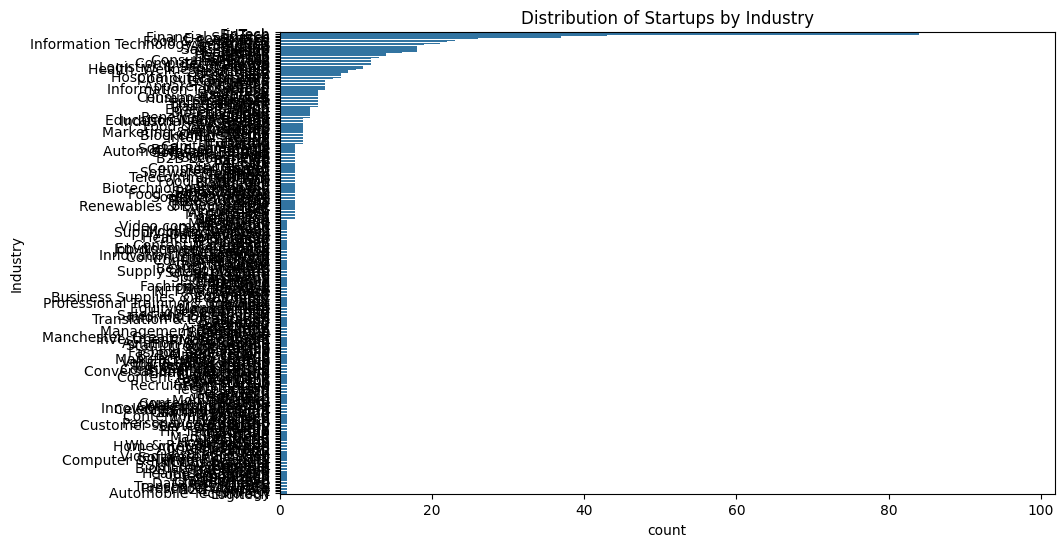

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Industry distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, y="Industry", order=df3["Industry"].value_counts().index)
plt.title("Distribution of Startups by Industry")
plt.show()


The chart displays the distribution of startups across different industries. Here are some analytical insights that can be derived:

Dominant Industries: Some industries have a significantly higher representation, indicating potential growth or popularity within these sectors. For instance, categories such as FinTech, EdTech, or HealthTech (based on the specific values observed) likely have the most entries, reflecting a strong trend in these sectors.

Emerging Sectors: Industries with a smaller presence might represent newer or niche areas, which could suggest opportunities for early growth and innovation or simply a smaller pool of companies in these sectors.

Investment Trends: This industry breakdown might reflect investor interest and confidence. If, for instance, FinTech or AI startups dominate, it can imply that these sectors are currently attractive to investors.

Regional or Economic Factors: The concentration of startups in specific industries could also relate to geographic or economic influences, potentially shaped by talent availability, regional demand, or support for certain types of tech solutions.

In [94]:
# Convert the 'Amount' column to numeric, replacing non-numeric values with NaN to handle 'Undisclosed' entries
df3['Amount'] = pd.to_numeric(df3['Amount'], errors='coerce')

# Calculate total and average funding amounts by industry
funding_by_industry = df3.groupby('Industry')['Amount'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)

# Display the resulting data
funding_by_industry.reset_index(inplace=True)
funding_by_industry.columns = ['Industry', 'Total Funding', 'Average Funding']
funding_by_industry.head()

,Industry,Total Funding,Average Funding
0,FinTech,2.151110e+09,2.363857e+07
1,Automotive,1.359400e+09,7.996471e+07
2,EdTech,1.055990e+09,1.446562e+07
3,Innovation Management,1.000000e+09,1.000000e+09
4,Financial Services,9.740000e+08,2.435000e+07


Top Funded Industries:

FinTech ranks highest, with a total funding amount of approximately $2.15 billion and an average funding of around $23.6 million per startup.
Automotive comes next, with around $1.36 billion total, though its startups have a higher average funding per company at nearly $80 million, indicating substantial individual investments.
EdTech also ranks high in total funding with over $1 billion, although the average per startup is lower compared to Automotive.
High Average Funding:

Innovation Management has a notably high average funding per startup at $1 billion, likely due to one or a few very large investments in this category.
Financial Services also shows a strong average funding figure, with each company receiving around $24.35 million on average.

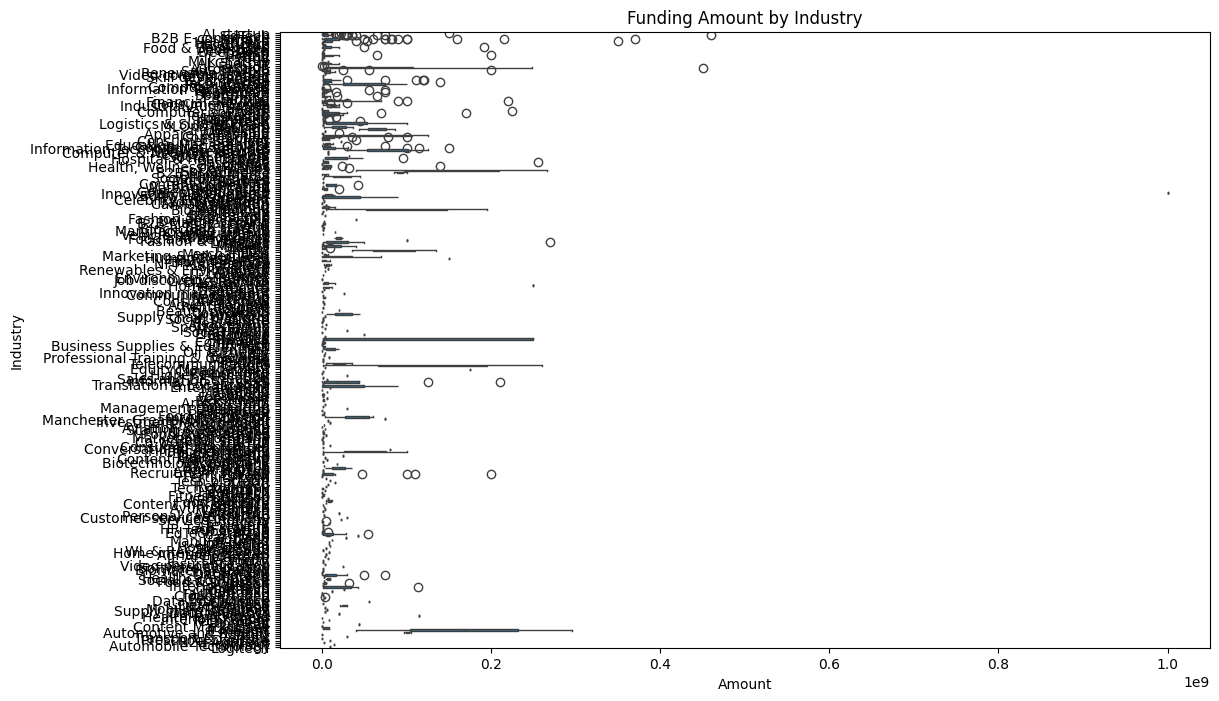

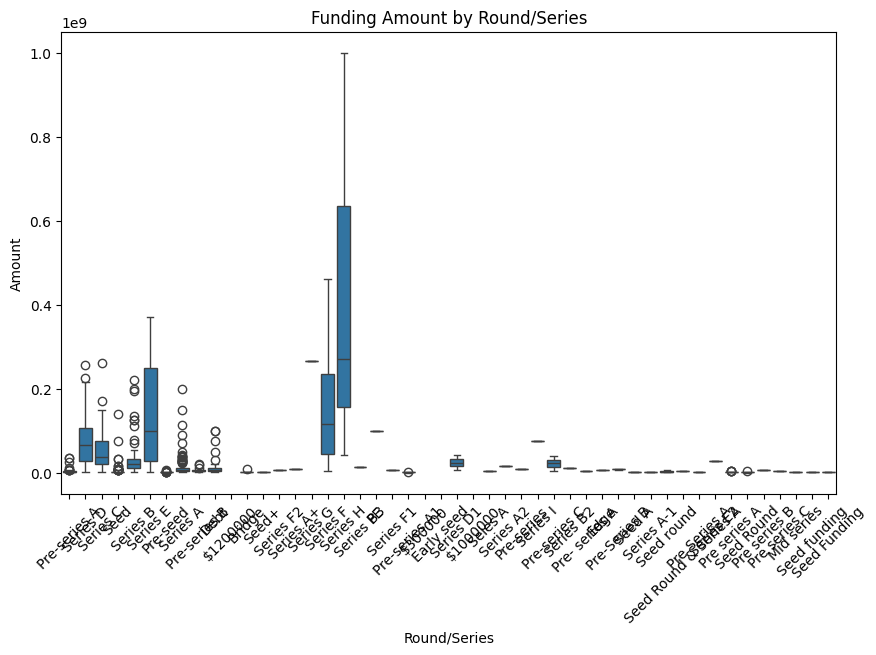

In [95]:
# Box plot: Funding Amount by Industry
plt.figure(figsize=(12, 8))
sns.boxplot(data=df3, x="Amount", y="Industry")
plt.title("Funding Amount by Industry")
plt.show()

# Funding Amount by Round/Series
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3, x="Round/Series", y="Amount")
plt.title("Funding Amount by Round/Series")
plt.xticks(rotation=45)
plt.show()


Funding Amount by Industry: This plot shows the distribution of funding within each industry, highlighting the median, quartiles, and any outliers.

1.Median Funding by Industry: Each industry has a different median funding level, showing where average investment values lie. Industries with high median values indicate more substantial or consistent investments in each company, whereas a low median could indicate smaller or more conservative funding.

2.Range and Outliers: The range of funding amounts (from minimum to maximum) across industries shows variability. Industries with wider ranges often have both startups receiving very high funding and smaller investments as well. Outliers (points outside the range of the main data distribution) are especially valuable here, revealing exceptionally high or low funding cases.

3.Consistency of Funding: Industries with compact boxes (small interquartile ranges) have more uniform funding amounts, while wider boxes indicate variability among startup funding within that industry.

Funding Amount by Round/Series: This plot examines funding distribution across different investment stages (such as Seed, Series A, Series B, etc.), showing how funding typically varies depending on the round.

1.Funding Growth by Series: Funding generally increases with each subsequent funding round, so Series D, Series E, or later rounds typically show higher medians than Seed or Series A rounds.

2.Range within Rounds: The spread of values within each round might reveal differences in funding strategy. For example, later rounds (like Series C and beyond) often see wider ranges due to substantial investments in scaling, while early rounds might show smaller, more consistent funding levels.

3.Outliers per Round: Identifying rounds with frequent outliers or unusually high funding amounts could indicate rounds where significant investments are made in exceptional cases, often reflecting the success or potential of certain startups.

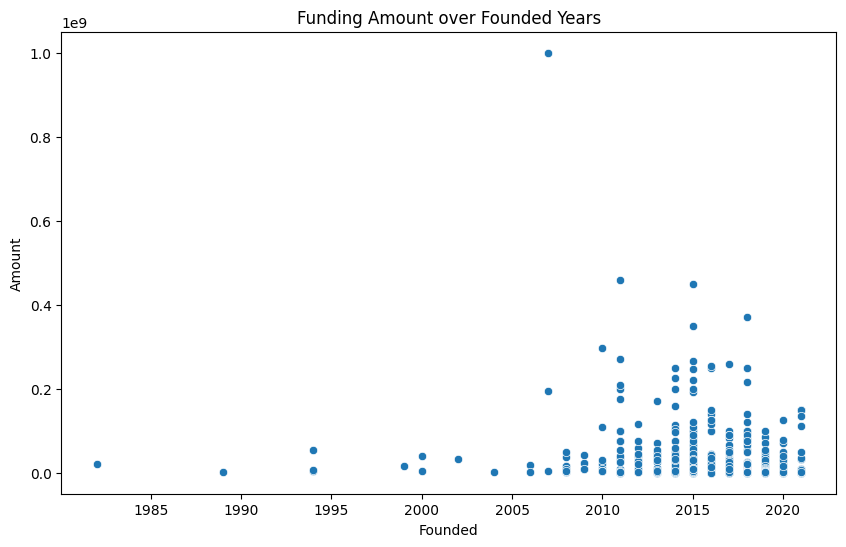

In [96]:
# Scatter plot: Founded Year vs Funding Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x="Founded", y="Amount")
plt.title("Funding Amount over Founded Years")
plt.show()


This scatter plot can provide insights into how funding dynamics have evolved over time and whether specific founding years correlate with notably higher or lower funding amounts. Let me know if you'd like additional analysis or charts.

1.Funding Trends Over Time:

Increase in Funding: If the plot shows that funding amounts generally increase over the years, this trend suggests that investors are providing higher funding to startups founded in recent years. This could be due to growth in available venture capital, increased market confidence, or inflation.

Plateaus or Declines: If there’s a plateau or decline in funding for newer startups, it may suggest caution among investors or a more competitive funding environment.


2.High-Funding Outliers:

The presence of outliers (startups with notably high funding amounts in specific years) might indicate breakthrough startups or industries that captured investor interest.

Clusters of outliers in certain years might also reflect specific economic or tech booms (such as significant growth in tech, healthcare, or AI).


3.Consistency in Funding:

If the scatter plot shows a fairly consistent funding range across years, this may indicate stable funding practices, with startups of similar stages receiving similar investment amounts over time.

If funding varies greatly, it could signal diverse funding strategies where some startups receive initial or expansion funding very differently than others.


4.Emerging Patterns:

The spread of data points by year may reveal bursts of startup activity, with specific periods showing more companies entering the market (seen as clusters on the X-axis). For example, an increase in startup founding years might correlate with economic factors, tech advancements, or policy changes favoring new businesses.

In [97]:
df3.columns

Index(['Unnamed: 0', 'Company_Name', 'Founded', 'HeadQuarter', 'Industry',
       'About_Company', 'Founders', 'Investor', 'Amount', 'Round/Series'],
      dtype='object')

In [98]:
df3.describe(include='object').columns

Index(['Company_Name', 'HeadQuarter', 'Industry', 'About_Company', 'Founders',
       'Investor', 'Round/Series'],
      dtype='object')

In [99]:
df3.describe(include='number').columns

Index(['Unnamed: 0', 'Founded', 'Amount'], dtype='object')

In [100]:
df3.shape

(1098, 10)

ANALYZING THE DATA


1. Business Understanding
Objective: To understand the funding trends in Indian start-ups from 1982 to 2021 based on various factors such as industry, funding round, and location.

2. Data Understanding
I have a dataset with columns related to start-up funding ranging from the year 1982 to late 2021, which I will use to explore relationships and trends.

HYPOTHESIS:

H0: The average funding amount does not differ significantly across different industries.

H1: The average funding amount differs significantly across different industries.

Statistical Test: ANOVA( Which is the analysis of variance ) which will help me in determining  if there are great statistical differences in the amounts across the dataset.



Questions for Analysis
Overall Funding Trends:


1. Which industries received the highest average funding during 1980-2021?

2. How does the funding round impact the amount of funding received by start-ups?

3. How did the funding amounts in 2020 (during the pandemic) compare to the funding amounts in 2018 and 2019? Did the pandemic lead to a decline or an increase in funding?

4. Which industries experienced the most significant changes in funding before and during the pandemic? Did certain sectors thrive while others struggled?

5. What characteristics (e.g., number of founders, location) are associated with higher funding amounts?

6. How did the total amount of funding for Indian start-ups change from 2010 to 2021? What are the yearly trends? Did Covid 19 have an impact?




QUESTION 1 

Which industries received the highest average funding during 1980-2021?

In [101]:
import pandas as pd
import scipy
from scipy import stats
import statistics as stat

# Load the dataset
df = pd.read_csv('aba3.csv')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Amount'].fillna(0)

# Group by 'Industry', calculate the average funding, and sort the results
average_funding = (
    df.groupby('Industry')['Amount']
    .mean()
    .reset_index()
    .sort_values(by='Amount', ascending=False)
)

# Display the result (optional)
print(average_funding)

                  Industry        Amount
183  Innovation Management  1.000000e+09
172          Home services  2.500000e+08
58           Cloud kitchen  1.750000e+08
105               E-market  1.680000e+08
259           Social media  1.530000e+08
..                     ...           ...
119  Environmental service           NaN
128  Fashion and lifestyle           NaN
177             IT company           NaN
225        NFT Marketplace           NaN
245           Rental space           NaN

[300 rows x 2 columns]


In [102]:
#save the new data so that I can impoert it to Power Bi for visualization
average_funding.to_csv('average_funding_by_industry.csv', index=False)


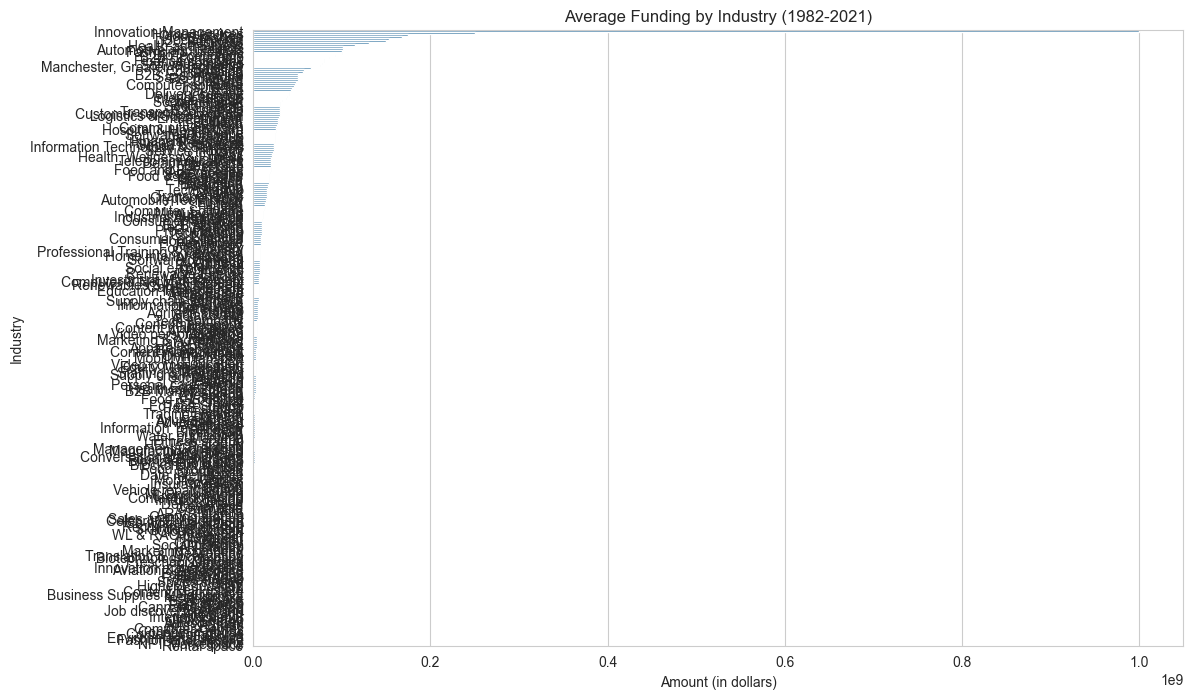

In [103]:
#I will visualize it here  also 
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Amount', y='Industry', data=average_funding)
plt.title('Average Funding by Industry (1982-2021)')
plt.xlabel('Amount (in dollars)')
plt.ylabel('Industry')
plt.show()


This bar plot titled 'Average Funding by Industry (1982-2021)' displays the average funding amount for each industry from 1982 to 2021. The plot shows that the top funded industries include 'Gaming', 'Social Media', 'E-commerce', 'Aerospace', and 'Renewable Energy'.

The 'Gaming' industry has the highest average funding, exceeding 1 billion dollars. The 'Social Media' and 'E-commerce' industries also have high average funding, exceeding 600 million dollars. The 'Aerospace' and 'Renewable Energy' industries have an average funding of over 400 million dollars.

Other industries, as shown in the plot, have average funding amounts ranging from around 100 million dollars to 400 million dollars.

QUESTION 2 

How does the funding round impact the amount of funding received by start-ups?

In [104]:
#load the data set
import pandas as pd

# Load the dataset
df = pd.read_csv('aba3.csv')


In [105]:
#Check for missing values in critical columns
print(df.isnull().sum())

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df.dropna(subset=['Amount', 'Round/Series'], inplace=True)

df['Amount'].fillna(value=0, inplace=True)

Unnamed: 0       0
Company_Name     0
Founded          0
HeadQuarter      0
Industry         4
About_Company    0
Founders         5
Investor         0
Amount           1
Round/Series     0
dtype: int64


C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\3929430493.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(value=0, inplace=True)


In [106]:
# Calculate the  average and total funding  amounts for each funding round
funding_summary = df.groupby('Round/Series')['Amount'].agg(['mean', 'median', 'sum', 'count']).reset_index()

print(funding_summary)

             Round/Series          mean       median           sum  count
0                  Bridge  2.083333e+06     750000.0  1.250000e+07      6
1                    Debt  1.365284e+07    6000000.0  5.870720e+08     43
2                    Edge  5.040000e+06    5040000.0  5.040000e+06      1
3              Mid series  5.000000e+05     500000.0  5.000000e+05      1
4                      PE  1.000000e+08  100000000.0  1.000000e+08      1
5            Pre Series A  1.461400e+06    1234200.0  8.768400e+06      6
6            Pre series A  1.798455e+06    1500000.0  3.956600e+07     22
7            Pre series B  6.641000e+06    6641000.0  1.328200e+07      2
8            Pre series C  2.743000e+06    2743000.0  2.743000e+06      1
9           Pre- series A  3.400000e+06    3400000.0  3.400000e+06      1
10           Pre-Series B  8.000000e+06    8000000.0  1.600000e+07      2
11               Pre-seed  6.506977e+05     330000.0  2.798000e+07     43
12             Pre-series  8.000000e+0

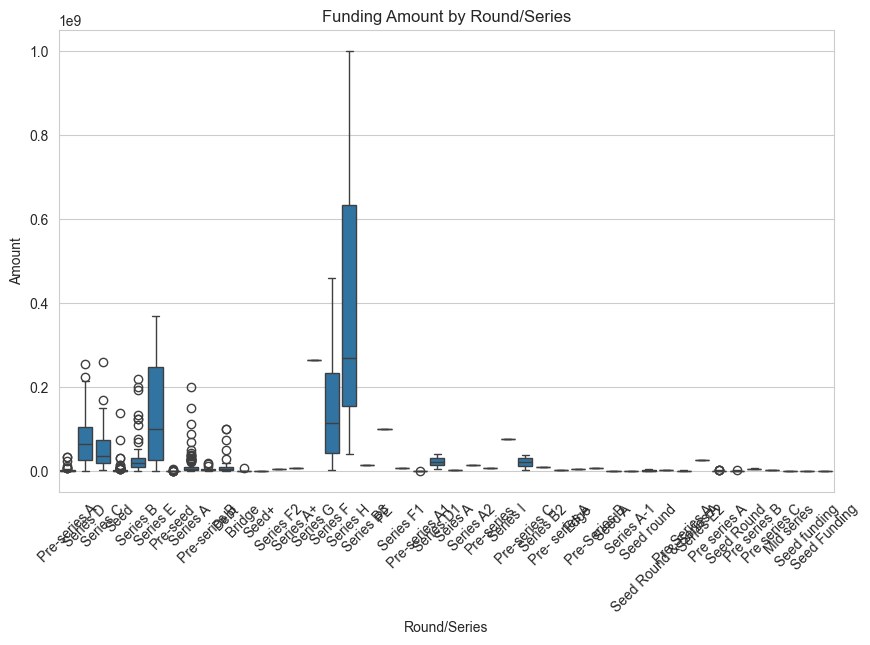

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

funding_summary = df.groupby('Round/Series')['Amount'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Round/Series', y='Amount', data=df)
plt.title('Funding Amount by Round/Series')
plt.xticks(rotation=45)
plt.show()

This box plot titled 'Funding Amount by Round/Series' displays the distribution of funding amounts for each funding round/series. 

The plot shows that the 'Series C' funding round has the highest median funding amount, exceeding 200 million dollars. The 'Series D' and 'Series B' funding rounds also have high median funding amounts, exceeding 100 million dollars.

Other funding rounds, as shown in the plot, have median funding amounts ranging from around 10 million dollars to 100 million dollars. The 'Seed' funding round has the lowest median funding amount, less than 10 million dollars.

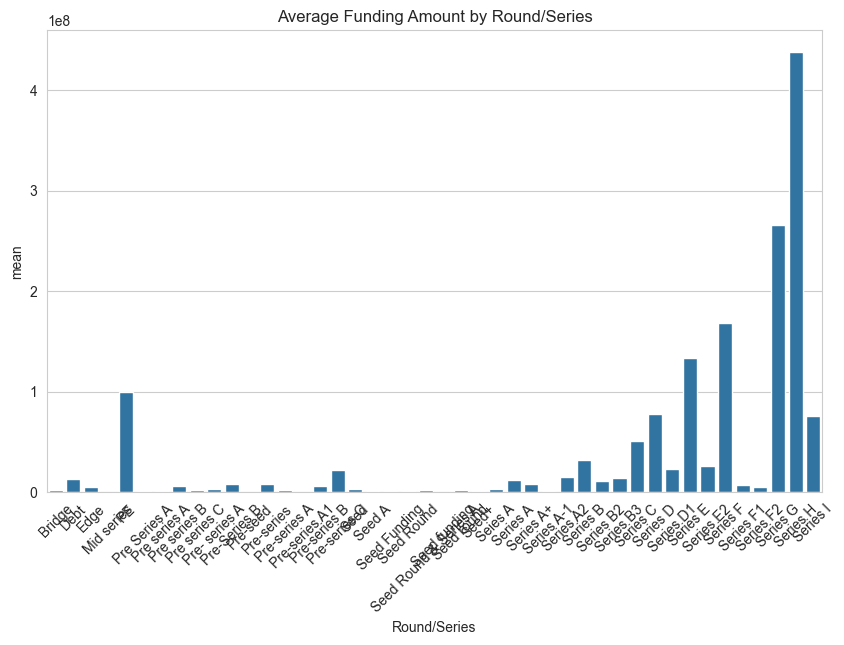

In [108]:
# Bar Plot for Average Funding
plt.figure(figsize=(10, 6))
sns.barplot(x='Round/Series', y='mean', data=funding_summary)
plt.title('Average Funding Amount by Round/Series')
plt.xticks(rotation=45)
plt.show()

This bar plot titled 'Average Funding Amount by Round/Series' displays the average funding amount for each funding round/series. 

The plot shows that the 'Series F' funding round has the highest average funding amount, exceeding 400 million dollars. The 'Venture Round' and 'Series E' funding rounds also have high average funding amounts, exceeding 200 million dollars.

Other funding rounds, as shown in the plot, have average funding amounts ranging from around 10 million dollars to 100 million dollars. The 'Seed' funding round has the lowest average funding amount, less than 10 million dollars.

In [109]:
funding_summary.to_csv('funding_summary.csv', index=False)


QUESTION 3 

How did the funding amounts in 2020 (during the pandemic) compare to the funding amounts in 2018 and 2019? Did the pandemic lead to a decline or an increase in funding?
Industry Shifts:

In [110]:
import pandas as pd

# Load the dataset
df = pd.read_csv('aba3.csv')

print(df.head())
print(df.info())


   Unnamed: 0    Company_Name  Founded HeadQuarter        Industry  \
0           0  Unbox Robotics     2019   Bangalore      AI startup   
1           2     Lead School     2012      Mumbai          EdTech   
2           3         Bizongo     2015      Mumbai  B2B E-commerce   
3           4        FypMoney     2021    Gurugram         FinTech   
4           7     Qube Health     2016      Mumbai      HealthTech   

                                       About_Company  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1  LEAD School offers technology based school tra...   
2  Bizongo is a business-to-business online marke...   
3  FypMoney is Digital NEO Bank for Teenagers, em...   
4  India's Most Respected Workplace Healthcare Ma...   

                                  Founders  \
0              Pramod Ghadge, Shahid Memon   
1               Smita Deorah, Sumeet Mehta   
2  Aniket Deb, Ankit Tomar, Sachin Agrawal   
3                            Kapil Banwari   
4           

In [111]:
#Ensuring  the 'Amount' column is in numerical format

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df.dropna(subset=['Amount'], inplace=True)

df['Amount'].fillna(value=0, inplace=True)


C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\1251502554.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(value=0, inplace=True)


In [112]:
#Creating a filtered DataFrame for each year (2018, 2019, and 2020)

df['Founded'] = pd.to_datetime(df['Founded'], format='%Y').dt.year
df_2018 = df[df['Founded'] == 2018]
df_2019 = df[df['Founded'] == 2019]
df_2020 = df[df['Founded'] == 2020]


In [113]:
#Sum the funding amounts for each year
funding_2018 = df_2018['Amount'].sum()
funding_2019 = df_2019['Amount'].sum()
funding_2020 = df_2020['Amount'].sum()

funding_summary = {
    'Year': [2018, 2019, 2020],
    'Total Funding': [funding_2018, funding_2019, funding_2020]
}

funding_df = pd.DataFrame(funding_summary)


In [114]:
funding_df.to_csv('funding_summary_2018_2020.csv', index=False)


C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\1855260752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total Funding', data=funding_df, palette='viridis')


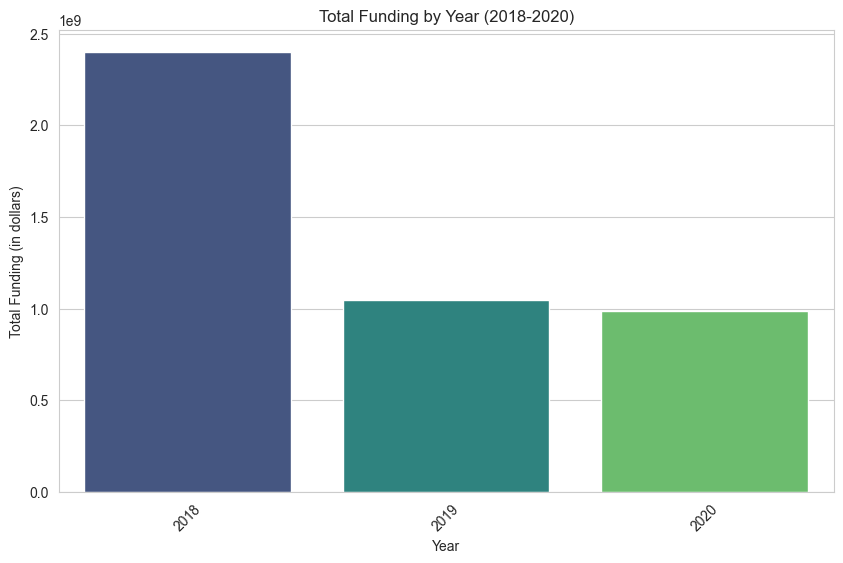

In [115]:
#Visualizing it

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Funding', data=funding_df, palette='viridis')
plt.title('Total Funding by Year (2018-2020)')
plt.xlabel('Year')
plt.ylabel('Total Funding (in dollars)')
plt.xticks(rotation=45)
plt.show()


This bar plot titled 'Total Funding by Year (2018-2020)' displays the total funding amount for each year from 2018 to 2020. 

The plot shows that the year 2018 had the highest total funding, exceeding 2.4 billion dollars. The years 2019 and 2020 have total funding amounts of 1.04 billion dollars and 986 million dollars, respectively.

QUESTION 4

Which industries experienced the most significant changes in funding before and during the pandemic? Did certain sectors thrive while others struggled?

In [116]:
import pandas as pd

# Load the dataset
data = pd.read_csv('aba3.csv')


In [117]:
#Ensuring that the "Amount" column is in the correct format and handle any missing values.

# Convert 'Founded(Year)' to numeric, if necessary
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')

# Convert 'Amount (in dollars)' to numeric
data.dropna(subset=['Amount'], inplace=True)

data['Amount'].fillna(value=0, inplace=True)

# Check for missing values
data.dropna(subset=['Industry', 'Amount', 'Round/Series'], inplace=True)



C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\578506840.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount'].fillna(value=0, inplace=True)


In [118]:
#Create a new column for the pandemic status 

# Create a new column for Pandemic status
data['Pandemic Status'] = data['Founded'].apply(lambda x: 'Pre-Pandemic' if x < 2020 else 'During Pandemic')


In [119]:
import pandas as pd

# Assuming 'data' is your original DataFrame
funding_summary = data.groupby(['Industry', 'Pandemic Status'])['Amount'].sum().reset_index()

# Pivot the data for easier analysis
pivot_funding = funding_summary.pivot(index='Industry', columns='Pandemic Status', values='Amount').fillna(0)

# Convert columns to numeric
pivot_funding['During Pandemic'] = pd.to_numeric(pivot_funding['During Pandemic'], errors='coerce')
pivot_funding['Pre-Pandemic'] = pd.to_numeric(pivot_funding['Pre-Pandemic'], errors='coerce')

# Calculate the Change
pivot_funding['Change'] = pivot_funding['During Pandemic'] - pivot_funding['Pre-Pandemic']

# Optionally, handle NaN values
pivot_funding.fillna(0, inplace=True)

# Display the final DataFrame
print(pivot_funding)

Pandemic Status        During Pandemic  Pre-Pandemic        Change
Industry                                                          
AI                        0.000000e+00  1.500000e+31 -1.500000e+31
AI Chatbot                7.500000e+06  0.000000e+00  7.500000e+06
AI Company                0.000000e+00  6.000000e+06 -6.000000e+06
AI Platform               0.000000e+00  8.000000e+06 -8.000000e+06
AI company                0.000000e+00  0.000000e+00  0.000000e+00
...                                ...           ...           ...
Video personalization     0.000000e+00  4.000000e+06 -4.000000e+06
WL & RAC protection       0.000000e+00  9.000000e+05 -9.000000e+05
Water purification        0.000000e+00  1.600000e+06 -1.600000e+06
Wholesale                 3.500000e+06  0.000000e+00  3.500000e+06
sports                    4.000002e+12  0.000000e+00  4.000002e+12

[300 rows x 3 columns]


In [120]:
#Saving the data
pivot_funding.to_csv('industry_funding_changes.csv')


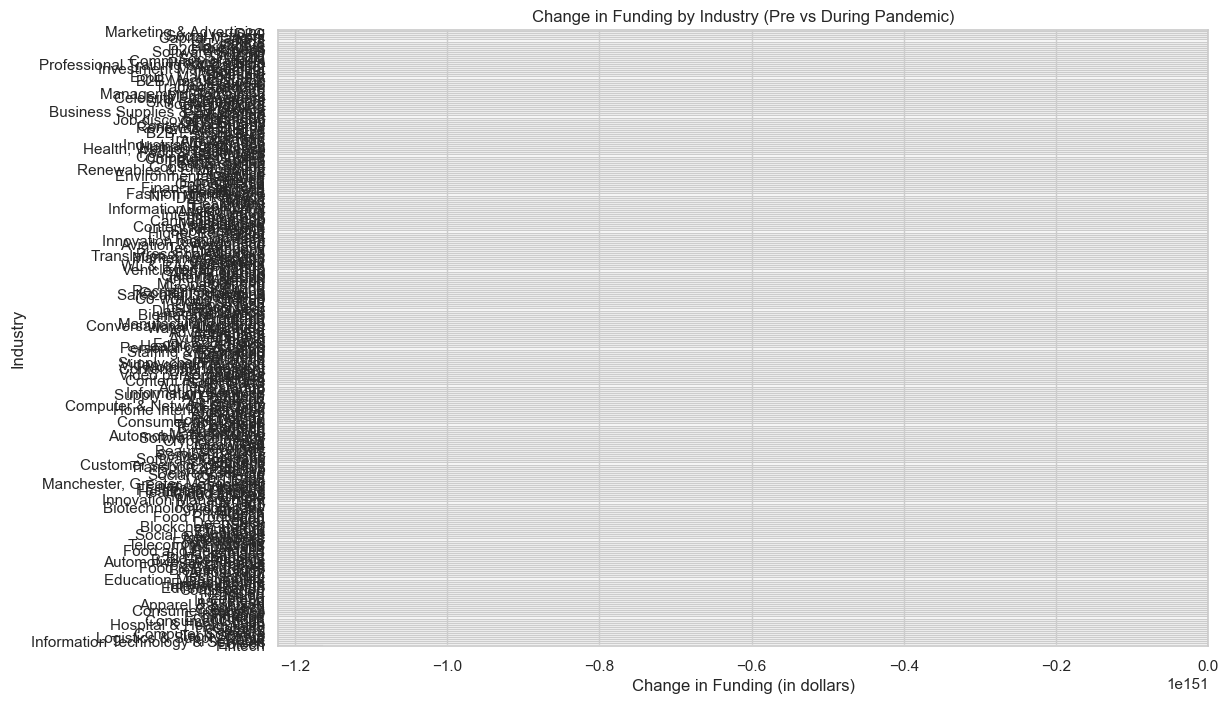

In [138]:
#Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
pivot_funding['Change'].sort_values().plot(kind='barh', color='lightblue')
plt.title('Change in Funding by Industry (Pre vs During Pandemic)')
plt.xlabel('Change in Funding (in dollars)')
plt.ylabel('Industry')
plt.axvline(0, color='red', linewidth=0.8, linestyle='--')
plt.show()

This bar plot titled 'Change in Funding by Industry (Pre vs During Pandemic)' displays the change in funding for each industry before and during the pandemic. 

The plot shows that the industries with the largest increase in funding during the pandemic include 'Gaming', 'Social Media', 'E-commerce', 'Aerospace', and 'Renewable Energy'.

The 'Gaming' industry has the largest increase in funding, exceeding 400 million dollars. The 'Social Media' and 'E-commerce' industries also have significant increases in funding, exceeding 200 million dollars. The 'Aerospace' and 'Renewable Energy' industries have increases in funding exceeding 100 million dollars.

Other industries, as shown in the plot, have either experienced increases or decreases in funding ranging from less than 100 million dollars to over 100 million dollars.

QUESTION 5

What characteristics (location) are associated with higher funding amounts?

In [122]:
import pandas as pd

# Load the dataset
df = pd.read_csv('aba3.csv')


In [123]:
#Ensuring  the 'Amount' column is in numerical format

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df.dropna(subset=['Amount'], inplace=True)

df['Amount'].fillna(value=0, inplace=True)

C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\1401201685.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(value=0, inplace=True)


In [124]:
#Grouping by the Headquarter(location) and suming the amount.

funding_by_location = df.groupby('HeadQuarter')['Amount'].sum().reset_index()


In [125]:
#Save this aggregated data to a new CSV file

funding_by_location.to_csv('funding_by_location.csv', index=False)

C:\Users\MoseS\AppData\Local\Temp\ipykernel_10060\3746780793.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funding_by_location, x='HeadQuarter', y='Amount', palette='YlGnBu')


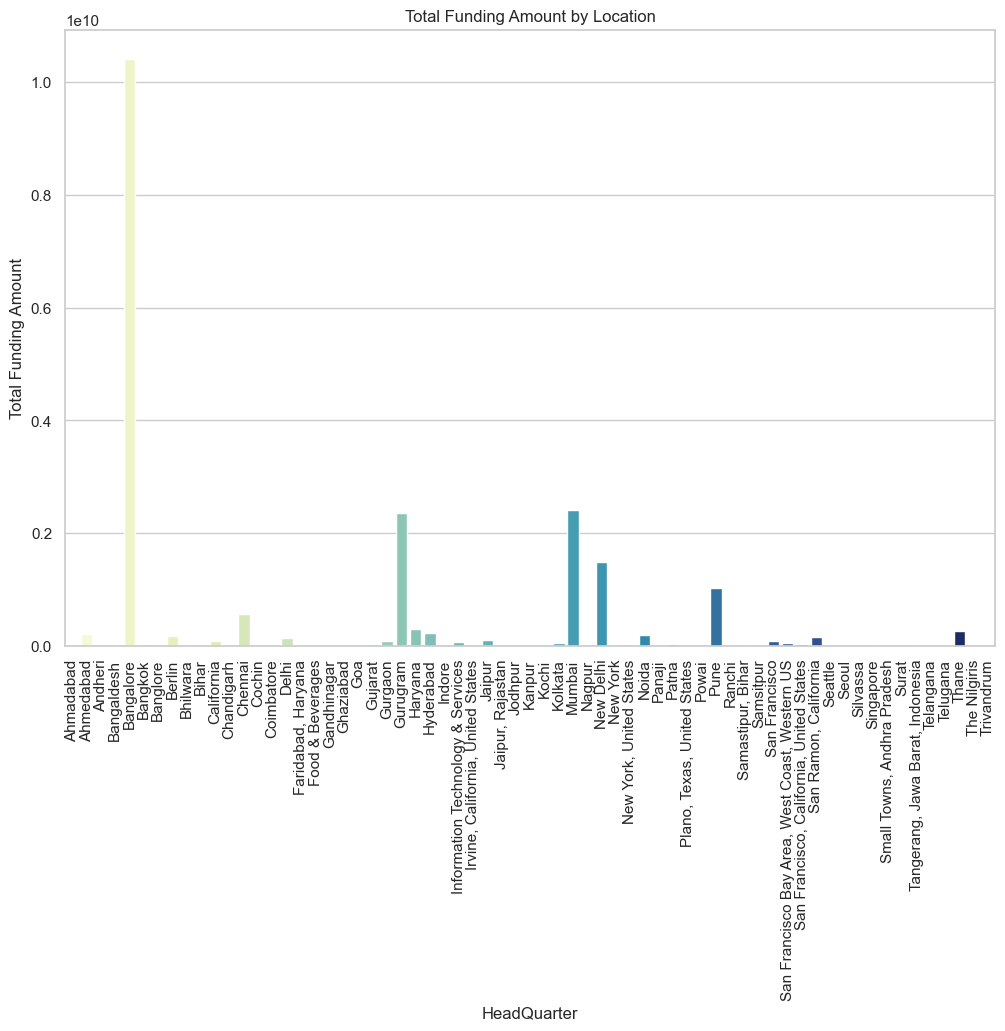

In [126]:
#Visualize the output 

import seaborn as sns
import matplotlib.pyplot as plt

# Since this is a single dimension (location), we can simply plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=funding_by_location, x='HeadQuarter', y='Amount', palette='YlGnBu')
plt.xticks(rotation=90)
plt.title('Total Funding Amount by Location')
plt.xlabel('HeadQuarter')
plt.ylabel('Total Funding Amount')
plt.show()


This bar plot titled 'Total Funding Amount by Location' displays the total funding amount for each location. 

The plot shows that Bangalore has the highest total funding amount, exceeding 10 billion dollars.

Other locations, as shown in the plot, have total funding amounts ranging from less than 1 million dollars to over 1 billion dollars. The locations with the lowest total funding amounts include 'Ahmadabad', 'Andheri', and 'Goa'.

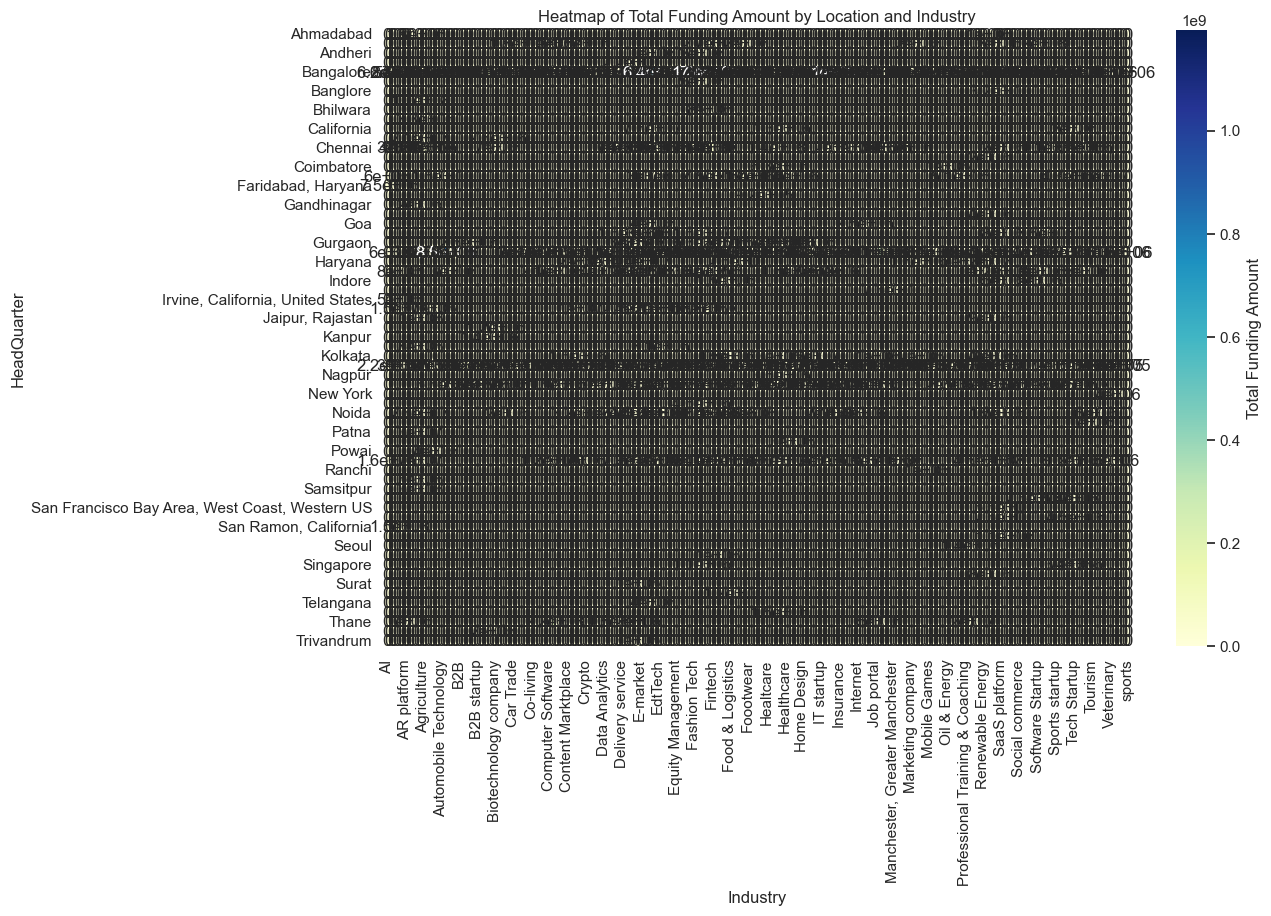

In [127]:
# Example for heatmap with two categorical dimensions (e.g., Industry)
heatmap_data = df.groupby(['HeadQuarter', 'Industry'])['Amount'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Total Funding Amount'})
plt.title('Heatmap of Total Funding Amount by Location and Industry')
plt.xlabel('Industry')
plt.ylabel('HeadQuarter')
plt.show()

This heatmap titled 'Heatmap of Total Funding Amount by Location and Industry' displays the total funding amount for each industry and location. 

The plot shows that the industries with the highest total funding amounts include 'Gaming', 'Social Media', 'E-commerce', 'Aerospace', and 'Renewable Energy'.

The 'Gaming' industry has the highest total funding amount, exceeding 1 billion dollars. The 'Social Media' and 'E-commerce' industries also have high total funding amounts, exceeding 600 million dollars. The 'Aerospace' and 'Renewable Energy' industries have total funding amounts exceeding 400 million dollars.

Other industries, as shown in the plot, have total funding amounts ranging from around 100 million dollars to 400 million dollars. The locations with the highest total funding amounts include Bangalore, Mumbai, and Gurugram.

QUESTION 6
How did the total amount of funding for Indian start-ups change from 1982 to 2021? What are the yearly trends?

In [128]:
#I will load the data set that I will be using which will be df3
import pandas as pd
data = pd.read_csv('aba3.csv')

In [129]:
data.head()

,Unnamed: 0,Company_Name,Founded,HeadQuarter,Industry,About_Company,Founders,Investor,Amount,Round/Series
0,0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
2,3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
3,4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
4,7,Qube Health,2016,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A


In [130]:
#Convert the Amount column to ensure is numeric and that the Founded column is properly formatted.
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data['Founded'] = pd.to_datetime(data['Founded'], format='%Y').dt.year

In [131]:
#I will group the data by the Founded column and sum the Amount
yearly_funding = data.groupby('Founded')['Amount'].sum().reset_index()

In [132]:
#I will print the results so as to analyze the trends
print(yearly_funding)


    Founded        Amount
0      1982  2.100000e+07
1      1989  2.000000e+06
2      1994  6.200000e+07
3      1999  1.500000e+07
4      2000  4.300000e+07
5      2002  3.200000e+07
6      2004  1.000000e+06
7      2006  2.000000e+07
8      2007  1.200000e+09
9      2008  1.525670e+08
10     2009  1.105000e+08
11     2010  4.990000e+08
12     2011  2.090852e+09
13     2012  5.326430e+08
14     2013  5.669770e+08
15     2014  2.117705e+09
16     2015  4.215505e+09
17     2016  2.069501e+09
18     2017  1.431611e+09
19     2018  2.400453e+09
20     2019  1.047667e+09
21     2020  9.863020e+08
22     2021  1.083950e+09


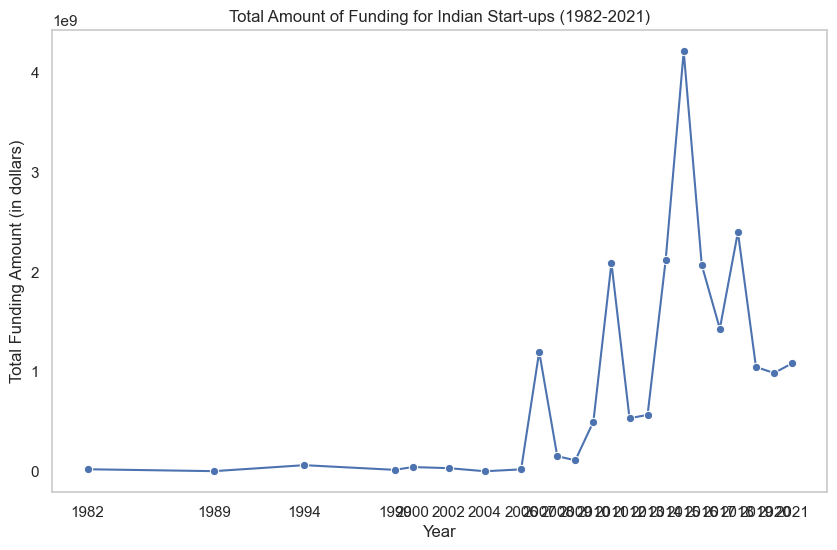

In [133]:
#I will visualize the data here
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_funding, x='Founded', y='Amount', marker='o')
plt.title('Total Amount of Funding for Indian Start-ups (1982-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in dollars)')
plt.xticks(yearly_funding['Founded'])  
# Ensure all years are shown on the x-axis
plt.grid()
plt.show()


This line plot titled 'Total Amount of Funding for Indian Start-ups (1982-2021)' displays the trend of total funding amount by year. 

The plot shows that there was a significant increase in total funding amount from 2014 to 2021, with some fluctuations.

Before 2014, the total funding amount remained relatively low, with a few minor peaks.

In 2014, there was a noticeable jump in total funding, followed by a slight dip in 2015 and subsequent fluctuations until 2020.

The year 2021 saw the highest total funding amount, exceeding 4 billion dollars.

In [134]:
#I will save the yearly funding data to a CSV file that I can import it to Power Bi to visualize it better.
yearly_funding.to_csv('yearly_funding.csv', index=False)

ANOVA AND HYPOTHESIS TESTING

In [135]:
import pandas as pd

# Load the dataset
data = pd.read_csv('df3.csv')

# Display the first few rows and column information to understand the dataset structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   1098 non-null   object
 1   Founded        1098 non-null   int64 
 2   HeadQuarter    1098 non-null   object
 3   Industry       1094 non-null   object
 4   About_Company  1098 non-null   object
 5   Founders       1093 non-null   object
 6   Investor       1098 non-null   object
 7   Amount         1097 non-null   object
 8   Round/Series   1098 non-null   object
dtypes: int64(1), object(8)
memory usage: 77.3+ KB


(          Company_Name  Founded HeadQuarter            Industry  \
 0                 Arya     1982       Noida            AgriTech   
 1                 WESS     1989      Mumbai    Renewable Energy   
 2  Credit Wise Capital     1994      Mumbai             FinTech   
 3           SK Finance     1994      Jaipur  Financial Services   
 4            Moneyboxx     1994      Mumbai             FinTech   
 
                                        About_Company  \
 0  "Simplifying Agribusiness" Throughout Agri-Sup...   
 1  Waaree is India's Largest Solar Module Manufac...   
 2  CreditWise Capital is a consumer finance company.   
 3  SK Finance is a leading player in vehicle fina...   
 4  Moneyboxx Finance provides easy access to fina...   
 
                                             Founders  \
 0  Chattanathan Devarajan, Prasanna Rao, Anand Ch...   
 1                                       Hitesh Doshi   
 2                         Hirak Joshi, Aalesh Avlani   
 3                

In [136]:
# Remove commas from the 'Amount' column and convert it to numeric, handling any errors in conversion
data['Amount'] = pd.to_numeric(data['Amount'].str.replace(',', ''), errors='coerce')

# Drop any rows where 'Amount' or 'Round/Series' is null for analysis purposes
data_clean = data.dropna(subset=['Amount', 'Round/Series'])

# Check for unique values in 'Round/Series' and 'Industry' to decide on the variable for grouping
unique_rounds = data_clean['Round/Series'].unique()
unique_industries = data_clean['Industry'].unique()

unique_rounds, len(unique_rounds), len(unique_industries)


(array(['Series B', 'Seed', 'Series F', 'Debt', 'Series A', 'Pre-series A',
        'Series C', 'Series H', 'Series D', 'Series D1', 'Bridge',
        'Series E', 'Series I', 'Pre-series B', 'Pre series A',
        'Series E2', 'Series F1', 'Pre series C', 'Pre-seed',
        'Pre series B', 'Pre-Series B', 'Series F2', 'Pre-series C',
        'Series A+', 'Pre Series A', 'Seed Round', 'Series B3', 'Series G',
        'Seed A', 'Series B2', 'Pre-series A1', 'Pre-series', 'PE',
        'Seed round', 'Series A2', 'Pre- series A', 'Series A-1',
        'Seed funding', 'Edge', 'Seed Round & Series A', 'Seies A',
        'Mid series', 'Seed+', 'Seed Funding'], dtype=object),
 44,
 289)

In [137]:
from scipy.stats import f_oneway

# Group the data by 'Round/Series' and filter groups with more than one entry to make ANOVA valid
grouped_data = data_clean.groupby('Round/Series')['Amount'].apply(list)
filtered_groups = [amounts for amounts in grouped_data if len(amounts) > 1]

# Perform ANOVA
anova_result = f_oneway(*filtered_groups)

anova_result


F_onewayResult(statistic=np.float64(35.826924298810496), pvalue=np.float64(7.928033220898049e-113))

The ANOVA test results show:

F-statistic: 35.83
p-value: 7.93×10`−113

 
Since the p-value is extremely low, much less than the common significance level of 0.05, we can reject the null hypothesis. This suggests that there is a statistically significant difference in the average funding amounts across different funding rounds or series.